---
### Pandas 이용한 CCTV 현황 분석
---

In [2]:
# CCTV 현황 데이터 읽기
import numpy as np
import pandas as pd

# 데이터 로딩
CCTV_Seoul = pd.read_csv(
    './data/01. CCTV_in_Seoul.csv' # 파일의 경로 지정
    , encoding='utf-8'
)
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [3]:
# 데이터 탐색
# 정렬, describe, info, head()
CCTV_Seoul.describe() 
# describe() = 범위 확인 가능

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [4]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [5]:
# 정렬해서 데이터 확인 : 소계 ASC
CCTV_Seoul.sort_values(
    by='소계' # 컬럼명
    , ascending=True # default
). head()
# sort한 결과가 dataframe이니까 head()를 줄 수 있다.

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [6]:
# 정렬해서 데이터 확인 : 소계 DESC
CCTV_Seoul.sort_values(
    by='소계' 
    , ascending=False
). head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [7]:
# 최근 증가율 구하고 컬럼 추가
# CCTV_Seoul['최근증가율'] = (14+15+16) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년']\
                        +CCTV_Seoul['2015년']\
                        +CCTV_Seoul['2016년'] ) \
                        / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [8]:
# 최근 3년간 많이 증가한 구를 확인 : 정렬
CCTV_Seoul.sort_values(
    by='최근증가율'
    , ascending=False
).head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [9]:
# 컬럼명 변경 : 기관명 => 구별 변경
CCTV_Seoul.rename(
    columns={
        CCTV_Seoul.columns[0] : '구별'
    }
    , inplace=True # 원본에 반영
)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [10]:
# 인구 현황
POP_Seoul = pd.read_excel(
    './data/01. population_in_Seoul.xls'
    , header=2
    , usecols='B, D, G, J, N'
)
POP_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
# 컬럼명 변경 : rename()
POP_Seoul.rename(
    columns={
        POP_Seoul.columns[0] : '구별'
        , POP_Seoul.columns[1] : '인구수'
        , POP_Seoul.columns[2] : '한국인'
        , POP_Seoul.columns[3] : '외국인'
        , POP_Seoul.columns[4] : '고령자'
    }
    , inplace=True # 원본에 반영
)
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
# 데이터프레임에서 행, 컬럼 삭제 : drop([인덱스], 축axis=0,1, inplace)
# axis = 0 : 행 방향 = 세로?
# axis = 1 : 열 방향 = 가로?
# 합계라는 행 삭제
POP_Seoul.drop(
    [0] # [0] : 0번행 삭제, 리스트 : 여러개 삭제 가능
    , axis=0
    , inplace=True
) # => return : None
# .head() 
# KeyError

In [13]:
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
# inplace 사용시 주의
# drop(inplace=False) : 복사된 object에서 삭제된 데이터프레임을 반환, header메소드 실행 가능
# drop(inplace=True) : 원본에 반영 = 복사 없다 = None 반환

In [15]:
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [16]:
# 구별 컬럼에 중복 값 확인 : 중복값 제거 => unique()
POP_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [17]:
# nan 값이 들어있는 행 확인 : 불린 인덱싱 사용
# isnull() : nan 값을 찾아서 boolean return : nan True
POP_Seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [18]:
# nan 값이 들어있는 행 추출
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [19]:
# 인구현황 파일 저장
# to_csv : 데이터프레임을 csv 파일로 저장
POP_Seoul.to_csv('./data/01 인구현황 nan 삭제까지.csv')
CCTV_Seoul.to_csv('./data/01 CCTV 현황 중간 데이터.csv')

# 3.4 화

In [20]:
# csv 파일 읽기
# 1. cctv 현황
import pandas as pd
import numpy as np

CCTV_Seoul = pd.read_csv(
    './data/01 CCTV 현황 중간 데이터.csv'
    , encoding='utf-8'
    , index_col=0 # 0번 컬럼을 인덱스로 보내라
)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [21]:
# 인구 현황 데이터 읽기
POP_Seoul = pd.read_csv(
    './data/01 인구현황 nan 삭제까지.csv'
    , encoding='utf-8'
    , index_col=0
)
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [22]:
# 인구 현황에서 외국인, 고령자 비율 구하기(인구수대비)
# 새로운 컬럼 생성 대입
POP_Seoul['외국인비율'] = POP_Seoul['외국인'] / POP_Seoul['인구수'] * 100 # 새로운 컬럼 만들기
POP_Seoul['고령자비율'] = POP_Seoul['고령자'] / POP_Seoul['인구수'] * 100 

POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [23]:
# 인구수 정렬
# POP_Seoul : dataframe object
POP_Seoul.sort_values(
    by='인구수' # 정렬할 컬럼 지정
    , ascending=False
). head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [24]:
# 외국인 데이터 확인
POP_Seoul.sort_values(
    by='외국인비율'
    ,ascending=False
).head()
# 이렇게 하면 정확하게 비교가 안된다.
# 인구수 대비 외국인 수가 중요하다. 즉, 비율이 중요하다

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [25]:
# 고령자 데이터 확인
POP_Seoul.sort_values(
    by='고령자비율'
    ,ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


---
## dataframe 병합
---

#### 데이터 병합 연습

In [26]:
# CCTV, 인구현황 dataframe 병합
df1 = pd.DataFrame({
      'A' : ['A0','A1','A2','A3']
    , 'B' : ['B0','B1','B2','B3']
    , 'C' : ['C0','C1','C2','C3']
    , 'D' : ['D0','D1','D2','D3']
}
, index=[0,1,2,3]
)


df2 = pd.DataFrame({
      'A' : ['A4','A5','A6','A7']
    , 'B' : ['B4','B5','B6','B7']
    , 'C' : ['C4','C5','C6','C7']
    , 'D' : ['D4','D5','D6','D7']
}
, index=[4,5,6,7]
)


df3 = pd.DataFrame({
      'A' : ['A8','A9','A10','A11']
      , 'B' : ['B8','B9','B10','B11']
      , 'C' : ['C8','C9','C10','C11']
      , 'D' : ['D8','D9','D10','D11']
}
, index=[8,9,10,11]
)

In [27]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [28]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [29]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [30]:
# 3개 데이터프레임을 병합 : concat([데이터프레임들], axis=0,1)
# axis = 0 : 아래로 병합, default
# axis = 1 : 옆으로 병합
# 아래로 병합 진행
result = pd.concat(
    [df1, df2, df3]
    , axis=0 # 아래로 병합, 컬럼명을 기준으로 병합
)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [31]:
result = pd.concat(
    [df1,df2,df3]
    ,axis=0
    ,keys = ['x','y','z']
)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [32]:
# 위 결과에서 index 다루기
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [33]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [34]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [35]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [36]:
# 새로운 데이터프레임 생성 : df4 => 컬럼 : 'B', 'D', 'F'
# df4, d41 병합
df4 = pd.DataFrame({
      'B' : ['B2','B3','B6','B7']
    , 'D' : ['D2','D3','D6','D7']
    , 'F' : ['F2','F3','F6','F7']
}
, index=[2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [37]:
df1, df4

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     B   D   F
 2  B2  D2  F2
 3  B3  D3  F3
 6  B6  D6  F6
 7  B7  D7  F7)

In [38]:
# 옆으로 병합 : concat([데이터프레임들], axis=1, join='inner')
result = pd.concat(
    [df1, df4]
    , axis=1 # 옆으로 병합, 인덱스 값이 키가 된다.
    , join='outer' # 디폴트, 풀아우터조인
    # outer join = 디폴트
)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [39]:
# 이너조인 : 키가 동일한 것만 조인
result = pd.concat(
    [df1, df4]
    , axis=1
    , join='inner'
)
result
# 인덱스 값이 key가 되서 인덱스 값이 같은것만 나온다. 

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [40]:
# 아래로 병합 : axis=0
result = pd.concat(
    [df1, df4]
    , axis=0
    , join='inner'
)
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [41]:
result = pd.concat(
    [df1, df4]
    , axis=1
    , join='outer'
    # , join_axes=[df1.index] # error
)
result
# 인덱스가 난리난다. = 그냥 합쳐져서

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [42]:
# axis=0 // 아래로 병합, join=outer 처리
result = pd.concat(
    [df1, df4]
    , ignore_index=True # 기존 인덱스를 무시하고 새로 처리
)
result
# concat의 문제점 
# 컬럼이나 인덱스를 key로 병합이 가능하다.
# 그럼 값(value)로 병합하고 싶으면? merge = 값으로 병합

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [43]:
# merge로 병합
# merge()
left = pd.DataFrame({
    'key' : ['k0','k4','k2','k3']
    , 'A' : ['a0','a1','a2','a3']
    , 'B' : ['b0','b1','b2','b3']
})
right = pd.DataFrame({
    'key' : ['k0','k1','k2','k3']
    , 'C' : ['c0','c1','c2','c3']
    , 'D' : ['d0','d1','d2','d3']
})
left, right

(  key   A   B
 0  k0  a0  b0
 1  k4  a1  b1
 2  k2  a2  b2
 3  k3  a3  b3,
   key   C   D
 0  k0  c0  d0
 1  k1  c1  d1
 2  k2  c2  d2
 3  k3  c3  d3)

In [44]:
pd.merge( # 특정 컬럼의 값으로 조인할 때 사용
    left=left
    , right=right
    , on='key' # 조인할 컬럼명 지정
    # , how='inner' # inner join = default
    # , how='outer' # outer join = default
    # , how='left' # left outer join = default
    , how='right' # right outer join = default
)

,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k1,NaN,NaN,c1,d1
2,k2,a2,b2,c2,d2
3,k3,a3,b3,c3,d3


#### CCTV 인구현황 병합, 분석

In [45]:
# 일단 데이터확인
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [46]:
# 인구현황 데이터 확인
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [ ]:
# CCTV, 인구현황 merge
# 구별 컬럼을 인덱스로 보낸 후 concat도 가능
data_result = pd.merge(
    left=CCTV_Seoul # left에 갈 데이터프레임
    , right=POP_Seoul # right에 갈 데이터프레임
    , on='구별' # 조인조건, 조인할 컬럼 저장
    # , how='inner' # 조인방법(inner,outer,left outer, right outer) // 이거 빼도 같은 결과
)
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [48]:
# 불필요한 컬럼 삭제 : dataframe => drop 메소드 사용 필요
del data_result['2013년도 이전'] # Series object 삭제 
del data_result['2014년'] # Series object 삭제 
del data_result['2015년'] # Series object 삭제 
del data_result['2016년'] # Series object 삭제

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [ ]:
# 구별이라는 컬럼을 key로 사용하기 위해 => 인덱스 보내는게 상당히 데이터 처리, 차트 처리시 편리하다
# data_result.set_index(컬럼명, inplace=True)
data_result.set_index('구별', inplace=True)
data_result.head()
# set_index 컬럼을 인덱스로 보내주는 메소드

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [ ]:
# 소계와 인구현황 컬럼들과 상관계수를 출력
# 상관계수 : -1 ~ 1, 0에 가까우면 관계없다
# 넘파이에 상관계수를 구하는 함수 : corrcoef(컬럼들)
# 인구수와 소계(CCTV개수)
np.corrcoef(data_result['인구수'], data_result['소계'])
# 인구수, 소계 = 약 0.30
# 0.15를 넘어가면 관계가 있다. 0.75를 넘어가면 상당히 관계가 있다.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

#### 데이터 시각화

plot 종류
1. 라인플롯
2. 스캐터 플롯
3. 바 차트
4. 히스토그램
5. 박스 플롯
6. 컨투어 플롯
7. 서피스 플롯
등등

- matplotlib library 시각화

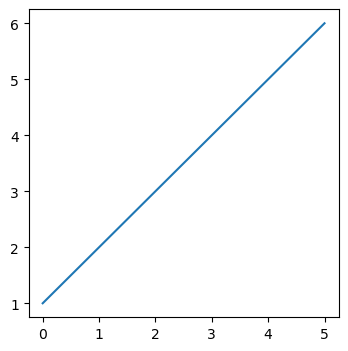

In [51]:
# line plot : 선그래프
# pyplot => matplotlib 서브 패키지

import matplotlib as mpl
import matplotlib.pyplot as plt # 주로 사용

# 시각화 단계
# 1. 도화지 준비(그릴 준비하는 것) : figure()
plt.figure(
    figsize=(4,4) # 도화지 크기 지정
)
# 2. plot : 그린다
plt.plot([1,2,3,4,5,6])
# 3. 화면에 출력
plt.show()

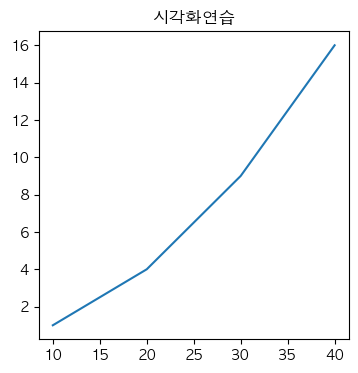

In [52]:
# 경고를 무시해라 - 화면에 표시하지 마라
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams # matplotlib 환경설정 모듈
rcParams['font.family'] = 'AppleGothic' # 한글 글꼴 설정
rcParams['axes.unicode_minus'] = False

# 타이틀 부여
plt.figure(figsize=(4,4))
plt.title('시각화연습') # 한글 깨진다
# 데이터 직접 지정
plt.plot([10,20,30,40],[1,4,9,16])
plt.show()

In [53]:
# line plot
# range() => return list
# arrange() => return ndarray(numpy)
x = np.arange(0,12,0.01) #(시작값, 종료값, 스텝)
y = np.sin(x) # 1200개 데이터

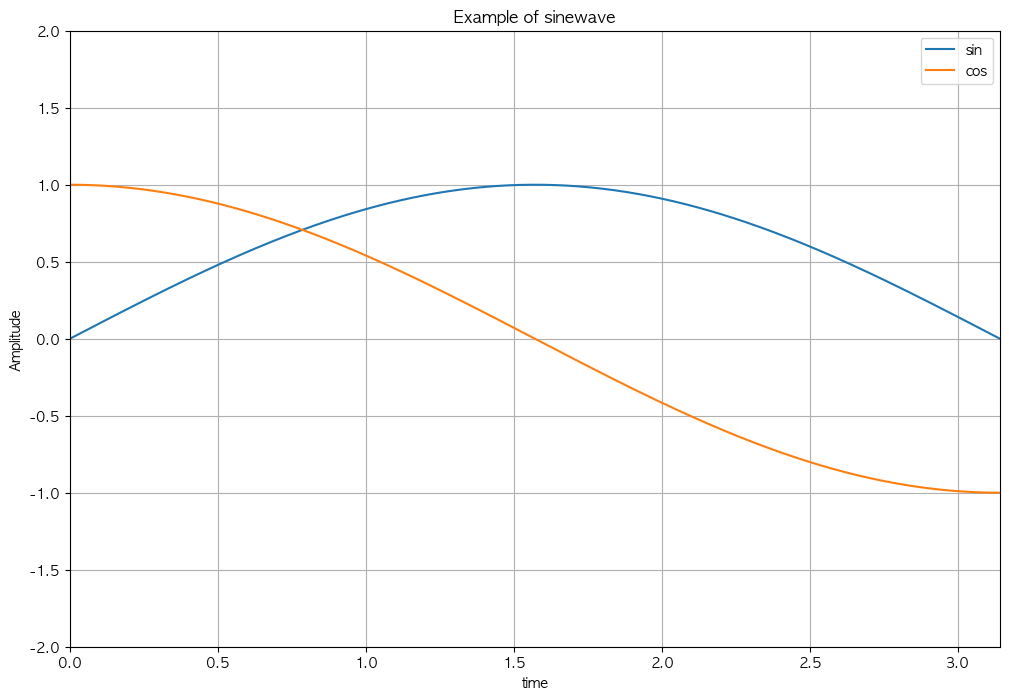

In [54]:
# 선 그래프
plt.figure(figsize=(12,8)) # 도화지 크기 지정
plt.plot(x,y, label='sin')
plt.plot(x,np.cos(x),label='cos')
plt.title('Example of sinewave')
plt.grid() # 그리드 표시
plt.legend() # 범례 표시
plt.xlabel('time') # x축 제목 설정
plt.ylabel('Amplitude') # y축 제목 설정
plt.xlim(0,np.pi) #np.pi : 3.141592 # x축 표시 범위 지정
plt.ylim(-2,2) # y축 표시 범위 지정
plt.show()

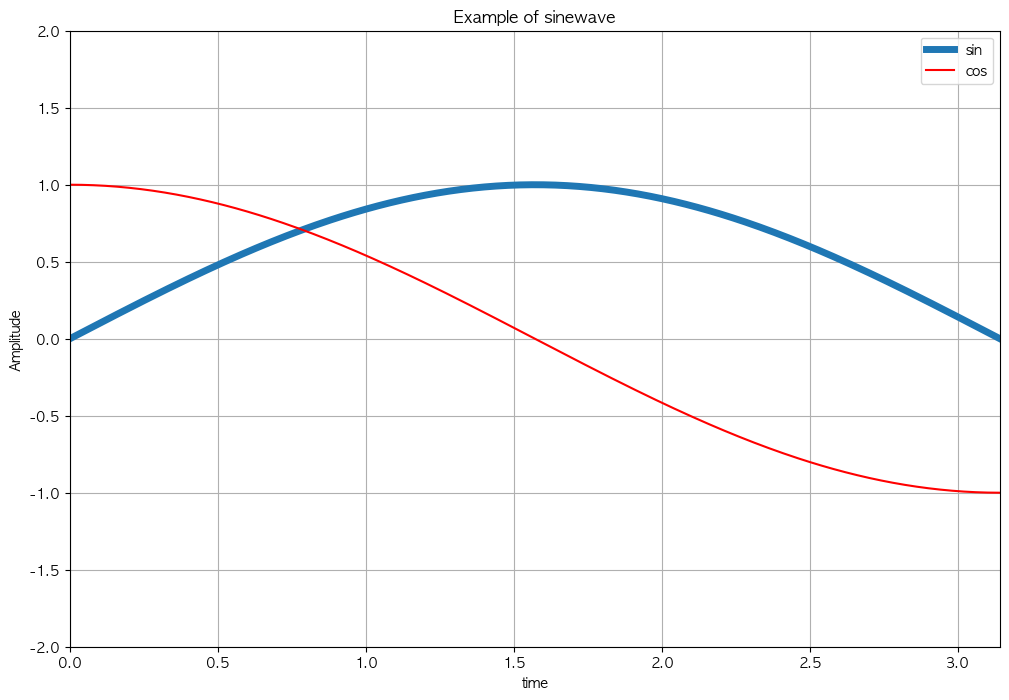

In [55]:
# 선 그래프
plt.figure(figsize=(12,8)) # 도화지 크기 지정
plt.plot(x,y,lw=5,label='sin') # 선두께 지정 : lw
plt.plot(x,np.cos(x),'r',label='cos') # 'r'=red
plt.title('Example of sinewave')
plt.grid() # 그리드 표시
plt.legend() # 범례 표시
plt.xlabel('time') # x축 제목 설정
plt.ylabel('Amplitude') # y축 제목 설정
plt.xlim(0,np.pi) #np.pi : 3.141592 # x축 표시 범위 지정
plt.ylim(-2,2) # y축 표시 범위 지정
plt.show()

In [56]:
# 선의 모양, 두께, 색 지정
# 데이터 생성
t = np.arange(0,5,0.5)
print(t, len(t))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] 10


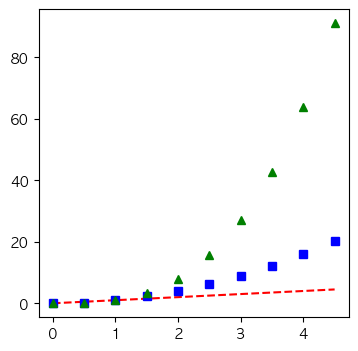

In [57]:
plt.figure(figsize=(4,4))
# plt.plot(t,t)
plt.plot(t,t,'r--') # r=red, -- = dashed(모양)
plt.plot(t,t**2,'bs') # b=blue, s(sqaure) = 마커모양(네모)
plt.plot(t,t**3,'g^') # g=green, ^(triangle) = 마커모양(세모)
plt.show()

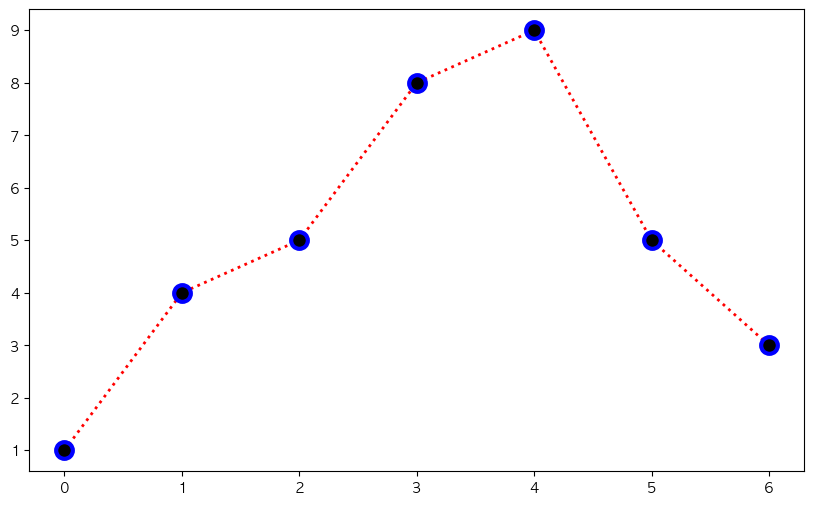

In [58]:
# 선그래프 설정 
# 데이터
x = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]

plt.figure(figsize=(10,6))
plt.plot(
    x, y, color = 'red' # color => c
    , linewidth = 2 # linewidth => lw
    , linestyle ='dotted' # linstyle => ls 'soild','dashed','dotted', 'dashdot'
    , marker = 'o' # 점모양
    , markeredgecolor='b' # 점의 바깥(경계선)색 blue
    , markerfacecolor='k'# 점의 면색 지정 k=black
    , markeredgewidth=3 # 점의 경계선 두께 지정
    , markersize=12 # 점의 크기
)
plt.show()

In [59]:
# 산점도 : scatter(점찍기) => 데이터 분포 확인시 사용, 데이터의 상관관계 확인
x1 = np.arange(0,10) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x2 = np.array([9,8,7,9,8,3,2,4,3,4])


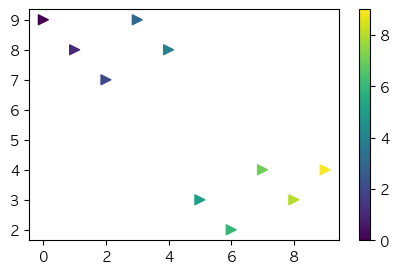

In [60]:
colormap = x1 # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(5,3))
plt.scatter(x1,x2, marker='>', s=50, c=colormap)
plt.colorbar()
plt.show()

#### CCTV와 인구현황 그래프로 분석

In [61]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Axes: xlabel='구별'>

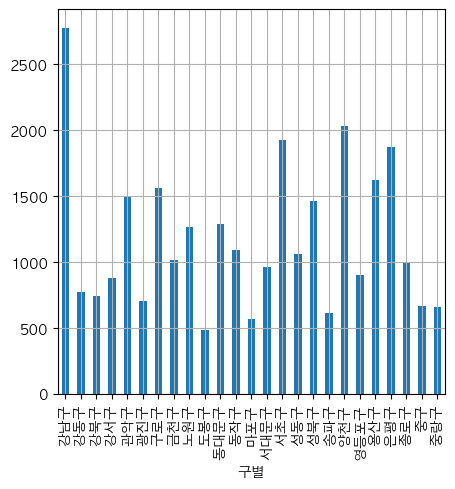

In [62]:
# 데이터프레임에서 차트 구성할 수 있다.
data_result['소계'].plot(
    kind='bar'
    , grid=True
    , figsize=(5,5)
)

<Axes: ylabel='구별'>

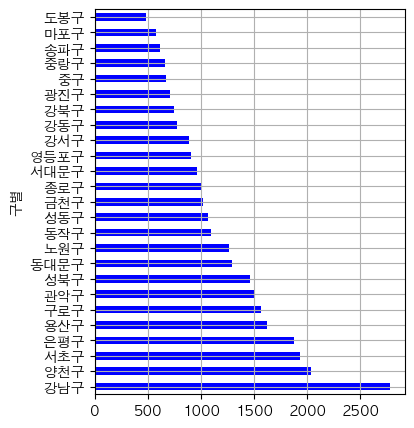

In [63]:
data_result['소계'].sort_values(ascending=False).plot(
    kind='barh'
    , grid=True
    , figsize=(4,5)
    , color='blue'
)

In [64]:
# 데이터 가공해서 시각화 : 소계 / 인구수 * 100
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


<Axes: ylabel='구별'>

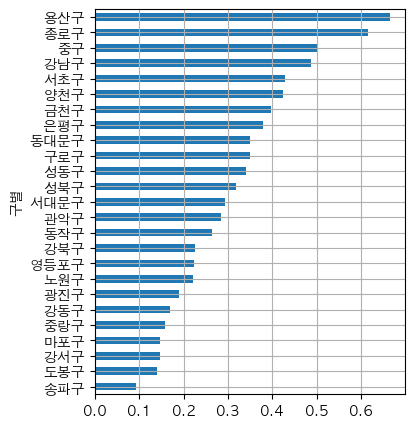

In [65]:
# 인구수에 비해 CCTV 대수가 많은 곳을 분석 후 시각화
data_result['CCTV비율'].sort_values().plot(
    kind='barh'
    , grid=True
    , figsize=(4,5)
)

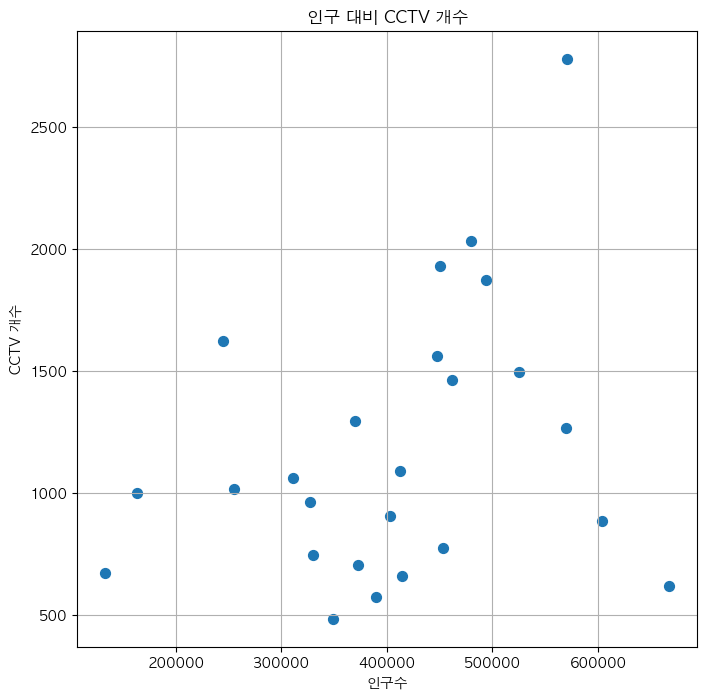

In [66]:
# scatter
# 산점도 : 관게를 나타낸다. 인구수 소계(CCTV개수)
plt.figure(figsize=(8,8)) # 도화지를 만든다.

plt.scatter(
    data_result['인구수'] # x축
    ,data_result['소계'] # y축
    , s=50
)

plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [67]:
# 직선의 함수 구하기
# 1. 계수 찾기 f(x) = a*x + b에서 a,b 찾기 : np.polyfit()
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
print(fp1)
# 2. 위 계수로 1차함수 오브젝트 생성 : np.poly1d(polyfit결과)
f1 = np.poly1d(fp1)
f1

[1.30916415e-03 6.45066497e+02]


poly1d([1.30916415e-03, 6.45066497e+02])

In [68]:
f1(100000), f1(700000)

(np.float64(775.9829117091169), np.float64(1561.4814024554903))

In [69]:
# np.linspace(구간시작, 구간끝, 구간나누어서 나온 개수)

for pop in np.linspace(100000,700000,7):
    print(pop, ':', f1(pop))

100000.0 : 775.9829117091169
200000.0 : 906.8993268335124
300000.0 : 1037.815741957908
400000.0 : 1168.7321570823035
500000.0 : 1299.648572206699
600000.0 : 1430.5649873310947
700000.0 : 1561.4814024554903


In [70]:
fx= np.linspace(100000,700000,100) # 100개 구간 생성

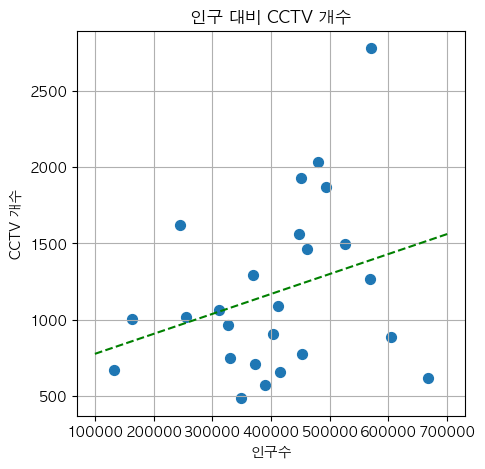

In [71]:
# scatter
# 산점도 : 관게를 나타낸다. 인구수 소계(CCTV개수)
plt.figure(figsize=(5,5)) # 도화지를 만든다.

plt.scatter( # 산점도 출력
    data_result['인구수'] # x축
    ,data_result['소계'] # y축
    , s=50
)

plt.plot( # 선그래프 출력
    fx # x축 : 10만~70만 100개 구간 값
    , f1(fx) # 1차방정식 타고 나온 CCTV 개수
    , ls='dashed'
    , color='g'
)

plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [72]:
# 오차 구하기 : 너무 많거나 적거나 한 '구'를 찾기 10개
data_result['오차'] = \
    np.abs(data_result['소계'] - f1(data_result['인구수']))
    
data_result.sort_values(by='오차', ascending=False)['오차'].head(10)

구별
강남구    1388.055355
송파구     900.911312
양천구     760.563512
서초구     695.403794
용산구     659.231690
도봉구     616.501341
마포구     581.180999
은평구     580.698457
강서구     551.503155
중랑구     527.718965
Name: 오차, dtype: float64

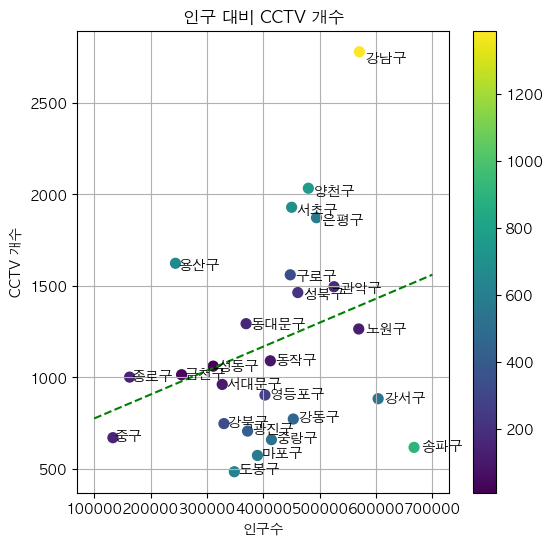

In [73]:
# scatter
# 산점도 : 관게를 나타낸다. 인구수 소계(CCTV개수)
plt.figure(figsize=(6,6)) # 도화지를 만든다.

plt.scatter( # 산점도 출력
    data_result['인구수'] # x축
    ,data_result['소계'] # y축
    , s=50
    , c=data_result['오차'] # 오차값으로 색을 줌
)

plt.plot( # 선그래프 출력
    fx # x축 : 10만~70만 100개 구간 값
    , f1(fx) # 1차방정식 타고 나온 CCTV 개수
    , ls='dashed'
    , color='g'
)

for n in range(len(data_result.index)): # 25번 반복 // [0,1,...,23,24]
    plt.text(
        data_result['인구수'].iloc[n] * 1.02 # x축(인구수) , n번째 인구수 추출 // 2프로 늘리고
        ,data_result['소계'].iloc[n] * 0.98 # y축(CCTV개수) , n번빼 CCTV 개수 추출 // 2프로 줄이고
        ,data_result.index[n] # 표시할 텍스트(구이름), n번째 구이름 추출
        ,fontsize=10
    )
    
plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.colorbar()
plt.show()

In [74]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [75]:
print(data_result.index)
print(len(data_result.index))
for n in range(len(data_result.index)):
    print(n, end=' ')

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')
25
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

In [76]:
data_result['인구수']

구별
강남구     570500.0
강동구     453233.0
강북구     330192.0
강서구     603772.0
관악구     525515.0
광진구     372164.0
구로구     447874.0
금천구     255082.0
노원구     569384.0
도봉구     348646.0
동대문구    369496.0
동작구     412520.0
마포구     389649.0
서대문구    327163.0
서초구     450310.0
성동구     311244.0
성북구     461260.0
송파구     667483.0
양천구     479978.0
영등포구    402985.0
용산구     244203.0
은평구     494388.0
종로구     162820.0
중구      133240.0
중랑구     414503.0
Name: 인구수, dtype: float64

In [77]:
# 오차로 정렬한 데이터프레임 생성
df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


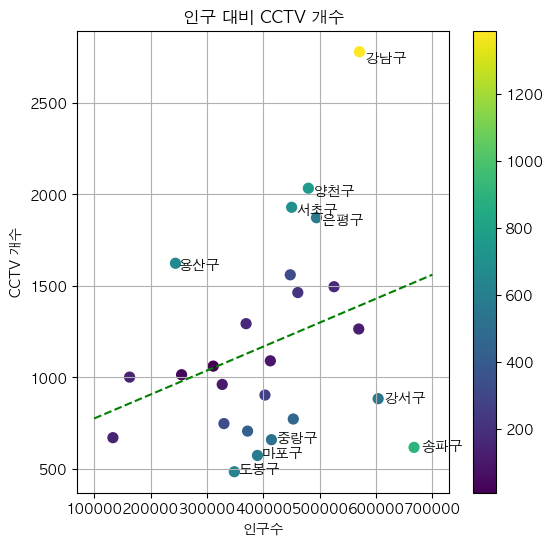

In [78]:
# scatter
# 산점도 : 관게를 나타낸다. 인구수 소계(CCTV개수)
plt.figure(figsize=(6,6)) # 도화지를 만든다.

plt.scatter( # 산점도 출력
    data_result['인구수'] # x축
    ,data_result['소계'] # y축
    , s=50
    , c=data_result['오차'] # 오차값으로 색을 줌
)

plt.plot( # 선그래프 출력
    fx # x축 : 10만~70만 100개 구간 값
    , f1(fx) # 1차방정식 타고 나온 CCTV 개수
    , ls='dashed'
    , color='g'
)

for n in range(10): # 25번 반복 // [0,1,...,23,24]
    plt.text(
        df_sort['인구수'].iloc[n] * 1.02 # x축(인구수) , n번째 인구수 추출 // 2프로 늘리고
        ,df_sort['소계'].iloc[n] * 0.98 # y축(CCTV개수) , n번빼 CCTV 개수 추출 // 2프로 줄이고
        ,df_sort.index[n] # 표시할 텍스트(구이름), n번째 구이름 추출
        ,fontsize=10
    )
    
plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.colorbar()
plt.show()